In [28]:
# JUSTIN'S AWESOME IMPORT CODE
import pandas as pd
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None #Sargis's hack: the warning happens because you're rewriting your original dataframe

params="GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F"
location="us:*"
key="f495836a65bedeff196d595e832e34b44d19386e"
url=f"https://api.census.gov/data/2018/abscs?get={params}&for={location}&key={key}"

full_list=json.loads(requests.get(url).text)
# print(full_list[0:2])
headers = full_list.pop(0)
df = pd.DataFrame(full_list, columns=headers)
df.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,us
0,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,3.0,None,8.9,None,7.7,None,7.0,None,1
1,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,19.2,None,0.0,None,13.5,None,1
2,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,8.2,None,4.8,None,7.4,None,1
3,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,5.9,None,4.3,None,5.6,None,6.3,None,1
4,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,6.0,None,16.2,None,6.7,None,10.7,None,1


In [ ]:
# https://api.census.gov/data/2018/abscs?get=EMPSZFI,EMPSZFI_LABEL,EMP&for=us:*&key=d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53
# https://api.census.gov/data/2018/abscs?get=NAME,EMP&for=state:28,53&key=d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53

In [14]:
# CLUSTERED BAR CHART???

params="ETH_GROUP,ETH_GROUP_LABEL,PAYANN,EMP"
location="us:*"
key="f495836a65bedeff196d595e832e34b44d19386e"
url=f"https://api.census.gov/data/2018/abscs?get={params}&for={location}&key={key}"

list01=json.loads(requests.get(url).text)
# print(list01[0:4])
headerslist01 = list01.pop(0)
df01 = pd.DataFrame(list01, columns=headerslist01)
df01.head()

,ETH_GROUP,ETH_GROUP_LABEL,PAYANN,EMP,us
0,001,Total,6937240308,128196406,1
1,020,Hispanic,101103299,2972140,1
2,028,Equally Hispanic/non-Hispanic,17395617,486636,1
3,029,Non-Hispanic,2689941006,60007007,1


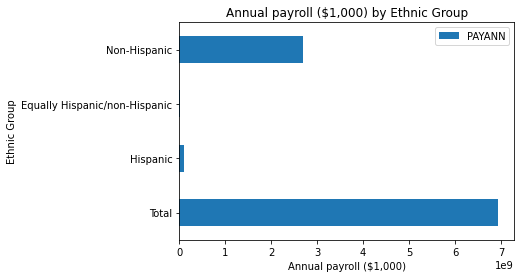

In [48]:
testing = df01[['ETH_GROUP_LABEL', 'PAYANN']]
# ethgr = df01.ETH_GROUP_LABEL.value_counts()
testing['PAYANN'] = pd.to_numeric(testing['PAYANN'])
testing.set_index('ETH_GROUP_LABEL',drop=True,inplace=True)
ax01 = testing.plot(title = 'Annual payroll ($1,000) by Ethnic Group',kind='barh')
ax01.set_xlabel('Annual payroll ($1,000)')
ax01.set_ylabel('Ethnic Group')
plt.show()

#SARGIS:
# emps = df[['EMP', 'EMPSZFI_LABEL']]
# emps['EMP'] = pd.to_numeric(emps['EMP'])
# emps.set_index("EMPSZFI_LABEL",drop=True,inplace=True)
# ax = emps.plot(title = 'Eployees per firm',kind='barh')
# ax.set_xlabel('Number of employees')
# ax.set_ylabel('')
# plt.show()

In [49]:
# HORIZONTAL BAR CHART

params="YIBSZFI,YIBSZFI_LABEL,RCPPDEMP,RCPPDEMP_F"
location="us:*"
key="f495836a65bedeff196d595e832e34b44d19386e"
url=f"https://api.census.gov/data/2018/abscs?get={params}&for={location}&key={key}"

list02=json.loads(requests.get(url).text)
headerslist02 = list02.pop(0)
df02 = pd.DataFrame(list02, columns=headerslist02)
df02.head()

,YIBSZFI,YIBSZFI_LABEL,RCPPDEMP,RCPPDEMP_F,us
0,001,All firms,38405539368,None,1
1,311,Firms with less than 2 years in business,680812490,None,1
2,318,Firms with 2 to 3 years in business,769496008,None,1
3,319,Firms with 4 to 5 years in business,724662955,None,1
4,321,Firms with 6 to 10 years in business,1735022260,None,1


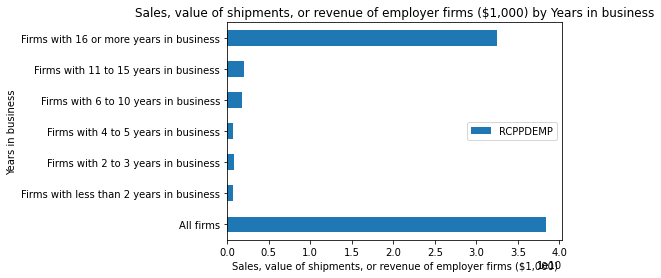

In [50]:
columns02 = df02[['YIBSZFI_LABEL', 'RCPPDEMP']]
columns02['RCPPDEMP'] = pd.to_numeric(columns02['RCPPDEMP'])
columns02.set_index('YIBSZFI_LABEL',drop=True,inplace=True)
ax02 = columns02.plot(title = 'Sales, value of shipments, or revenue of employer firms ($1,000) by Years in business',kind='barh')
ax02.set_xlabel('Sales, value of shipments, or revenue of employer firms ($1,000)')
ax02.set_ylabel('Years in business')
plt.show()

In [88]:
# CLUSTERED BAR CHART

params="SEX,SEX_LABEL,EMP,PAYANN"
location="us:*"
key="f495836a65bedeff196d595e832e34b44d19386e"
url=f"https://api.census.gov/data/2018/abscs?get={params}&for={location}&key={key}"

list03=json.loads(requests.get(url).text)
headerslist03 = list03.pop(0)
df03 = pd.DataFrame(list03, columns=headerslist03)
df03.head()

,SEX,SEX_LABEL,EMP,PAYANN,us
0,001,Total,128196406,6937240308,1
1,002,Female,10149257,388085223,1
2,003,Male,45346405,2140501692,1
3,004,Equally male/female,7970121,279853007,1


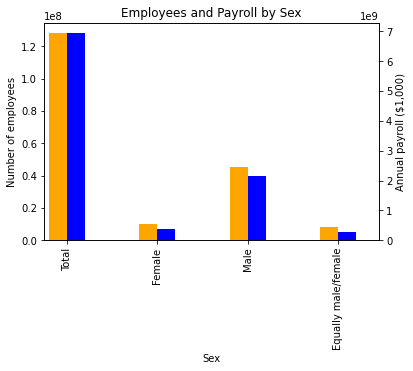

In [91]:
columns03 = df03[['SEX_LABEL', 'EMP', 'PAYANN']]
columns03.set_index('SEX_LABEL',drop=True,inplace=True)
columns03['EMP'] = pd.to_numeric(columns03['EMP'])
columns03['PAYANN'] = pd.to_numeric(columns03['PAYANN'])
fig03 = plt.figure()
ax3a = fig03.add_subplot(111) # "Figure, please build a 1x1 grid and put me in the first section."
ax3b = ax3a.twinx()
width = 0.2 # width of bars
columns03.EMP.plot(kind='bar',color='orange',ax=ax3a,width=width,position=1,title = 'Employees and Payroll by Sex')
columns03.PAYANN.plot(kind='bar',color='blue',ax=ax3b,width=width,position=0)
ax3a.set_xlabel('Sex')
ax3a.set_ylabel('Number of employees')
ax3b.set_ylabel('Annual payroll ($1,000)')
plt.show()

# columns03 = df03[['SEX_LABEL', 'EMP', 'PAYANN']]
# columns03['EMP'] = pd.to_numeric(columns03['EMP'])
# columns03['PAYANN'] = pd.to_numeric(columns03['PAYANN'])
# ax03 = columns03.plot(x='SEX_LABEL',y=['EMP','PAYANN'],kind='bar',title = 'INSERT TITLE HERE')
# ax03.set_xlabel('Sex')
# ax03.set_ylabel('Annual Payroll, Number of employees')
# plt.show()

In [63]:
# CLUSTERED BAR CHART

params="ETH_GROUP,ETH_GROUP_LABEL,PAYANN,EMP"
location="us:*"
key="f495836a65bedeff196d595e832e34b44d19386e"
url=f"https://api.census.gov/data/2018/abscs?get={params}&for={location}&key={key}"

list04=json.loads(requests.get(url).text)
headerslist04 = list04.pop(0)
df04 = pd.DataFrame(list04, columns=headerslist04)
df04.head()

,ETH_GROUP,ETH_GROUP_LABEL,PAYANN,EMP,us
0,001,Total,6937240308,128196406,1
1,020,Hispanic,101103299,2972140,1
2,028,Equally Hispanic/non-Hispanic,17395617,486636,1
3,029,Non-Hispanic,2689941006,60007007,1


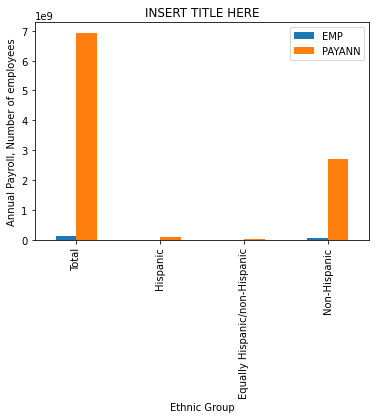

In [75]:
columns04 = df04[['ETH_GROUP_LABEL', 'EMP', 'PAYANN']]
columns04['EMP'] = pd.to_numeric(columns04['EMP'])
columns04['PAYANN'] = pd.to_numeric(columns04['PAYANN'])
ax04 = columns04.plot(x='ETH_GROUP_LABEL',y=['EMP','PAYANN'],kind='bar',title = 'INSERT TITLE HERE')
ax04.set_xlabel('Ethnic Group')
ax04.set_ylabel('Annual Payroll, Number of employees')
plt.show()

In [66]:
# CLUSTERED BAR CHART

params="ETH_GROUP,ETH_GROUP_LABEL,PAYANN,EMP"
location="us:*"
key="f495836a65bedeff196d595e832e34b44d19386e"
url=f"https://api.census.gov/data/2018/abscs?get={params}&for={location}&key={key}"

list05=json.loads(requests.get(url).text)
headerslist05 = list05.pop(0)
df05 = pd.DataFrame(list05, columns=headerslist05)
df05.head()

,ETH_GROUP,ETH_GROUP_LABEL,PAYANN,EMP,us
0,001,Total,6937240308,128196406,1
1,020,Hispanic,101103299,2972140,1
2,028,Equally Hispanic/non-Hispanic,17395617,486636,1
3,029,Non-Hispanic,2689941006,60007007,1


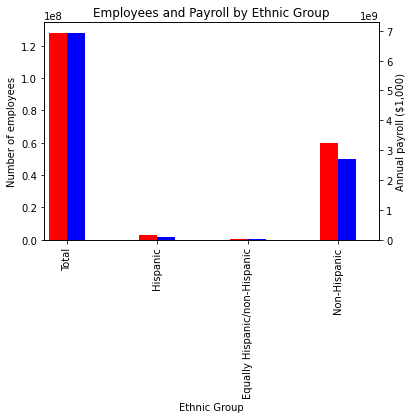

In [86]:
columns05 = df05[['ETH_GROUP_LABEL', 'EMP', 'PAYANN']]
columns05.set_index('ETH_GROUP_LABEL',drop=True,inplace=True)
columns05['EMP'] = pd.to_numeric(columns05['EMP'])
columns05['PAYANN'] = pd.to_numeric(columns05['PAYANN'])
fig05 = plt.figure()
ax5a = fig05.add_subplot(111) # "Figure, please build a 1x1 grid and put me in the first section."
ax5b = ax5a.twinx()
width = 0.2 # width of bars
columns05.EMP.plot(kind='bar',color='red',ax=ax5a,width=width,position=1,title = 'Employees and Payroll by Ethnic Group')
columns05.PAYANN.plot(kind='bar',color='blue',ax=ax5b,width=width,position=0)
ax5a.set_xlabel('Ethnic Group')
ax5a.set_ylabel('Number of employees')
ax5b.set_ylabel('Annual payroll ($1,000)')
plt.show()

In [ ]:
# SARGIS TWO Y AXES
# rev = df_1[['NAME', 'EMP', 'PAYANN']]
# rev['EMP'] = pd.to_numeric(rev['EMP'])
# rev.set_index("NAME",drop=True,inplace=True)
# rev['PAYANN'] = pd.to_numeric(rev['PAYANN'])
# ax = rev.plot(title = 'Ann Payroll and Num of Empl per Metro Area', secondary_y='PAYANN', kind='bar')
# ax.set_xlabel('')
# ax.set_ylabel('Number of Employees')
# ax.right_ax.set_ylabel('Annual payroll ($1000)')
# plt.show()